<a href="https://colab.research.google.com/github/emiliomercuri/EnvHidrology2024/blob/main/aulas/2024_03_11-Aula_05/2023_03_11_01_Balan%C3%A7o_H%C3%ADdrico_lendo_da_base_CABra_526_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Leitura dos dados da Base CABra

1. Acessar o site da plataforma Catchments Attributes for Brazil (CABra) https://thecabradataset.shinyapps.io/CABra/

2. Baixar os dados **Climate** e **Streamflow**

3. Colocar os arquivos no Google Drive

4. Compartilhar os arquivos (opção "qualquer pessoa com o link") e copiar o link

In [ ]:
import pandas as pd
import numpy
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

In [ ]:
# Atualizar o Google Download
!pip install --upgrade --no-cache-dir gdown

## Download dos dados na máquina virtual Google

Copiar o código que está no link:
https://drive.google.com/file/d/1TaMLC6-FbfXKltZRvCmGPEGUFwm6NVG8/view?usp=sharing

In [ ]:
# Baixa dados da base CABra 526
!gdown 1374zwqD5mHq1XgENQjDHUKySHen4WuK5
!gdown 1FRHTt_u_guwNNSYXN3K2viaim-m5PXLU

## Leitura dos dados climáticos

In [ ]:
# leitura dos dados com pandas
df_climate = pd.read_csv('CABra_526_climate_ENS.txt',sep='\s+',skiprows=13)
df_climate

,Year,Month,Day,p_ens,tmin_ens,tmax_ens,rh_ens,wnd_ens,srad_ens,et_ens,pet_pm,pet_pt,pet_hg
0,mm,°C,°C,%,m,s¯¹,MJ,m¯²,mm,mm,mm,mm,NaN
1,1980,1,1,0.677,17.676,26.629,62.985,1.815,26.798,3.405,6.079,7.587,5.871
2,1980,1,2,0.083,16.755,28.643,65.352,0.920,27.823,3.300,6.526,7.936,6.194
3,1980,1,3,0.242,18.429,31.144,66.361,0.965,25.711,3.365,6.399,7.590,6.028
4,1980,1,4,3.510,21.182,30.923,69.908,1.179,21.024,3.029,5.351,6.386,5.074
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11319,2010,12,27,6.610,23.763,33.269,73.433,1.074,21.037,3.303,5.540,6.574,5.393
11320,2010,12,28,9.346,24.225,32.743,73.678,1.374,20.234,3.412,5.363,6.347,5.201
11321,2010,12,29,13.230,23.033,30.700,79.372,0.984,16.823,3.151,4.394,5.255,4.160
11322,2010,12,30,5.063,23.390,32.684,75.161,0.688,22.576,3.865,5.728,6.992,5.722


In [ ]:
# Remove a primeira linha do dataframe
df_climate = df_climate.drop([0])
df_climate

,Year,Month,Day,p_ens,tmin_ens,tmax_ens,rh_ens,wnd_ens,srad_ens,et_ens,pet_pm,pet_pt,pet_hg
1,1980,1,1,0.677,17.676,26.629,62.985,1.815,26.798,3.405,6.079,7.587,5.871
2,1980,1,2,0.083,16.755,28.643,65.352,0.920,27.823,3.300,6.526,7.936,6.194
3,1980,1,3,0.242,18.429,31.144,66.361,0.965,25.711,3.365,6.399,7.590,6.028
4,1980,1,4,3.510,21.182,30.923,69.908,1.179,21.024,3.029,5.351,6.386,5.074
5,1980,1,5,6.788,22.297,31.658,74.576,1.537,20.882,3.909,5.466,6.409,5.147
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11319,2010,12,27,6.610,23.763,33.269,73.433,1.074,21.037,3.303,5.540,6.574,5.393
11320,2010,12,28,9.346,24.225,32.743,73.678,1.374,20.234,3.412,5.363,6.347,5.201
11321,2010,12,29,13.230,23.033,30.700,79.372,0.984,16.823,3.151,4.394,5.255,4.160
11322,2010,12,30,5.063,23.390,32.684,75.161,0.688,22.576,3.865,5.728,6.992,5.722


In [ ]:
ano = df_climate['Year'].values
mes = df_climate['Month'].values
dia = df_climate['Day'].values

In [ ]:
data = []
for i in range(len(df_climate)):
    data.append(ano[i] + '-' + mes[i] + '-' + dia[i])
#data

In [ ]:
lista = []
for i in range(len(df_climate)):
    lista.append(datetime.strptime(data[i], '%Y-%m-%d'))

In [ ]:
df_climate['data'] = lista
df_climate

,Year,Month,Day,p_ens,tmin_ens,tmax_ens,rh_ens,wnd_ens,srad_ens,et_ens,pet_pm,pet_pt,pet_hg,data
1,1980,1,1,0.677,17.676,26.629,62.985,1.815,26.798,3.405,6.079,7.587,5.871,1980-01-01
2,1980,1,2,0.083,16.755,28.643,65.352,0.920,27.823,3.300,6.526,7.936,6.194,1980-01-02
3,1980,1,3,0.242,18.429,31.144,66.361,0.965,25.711,3.365,6.399,7.590,6.028,1980-01-03
4,1980,1,4,3.510,21.182,30.923,69.908,1.179,21.024,3.029,5.351,6.386,5.074,1980-01-04
5,1980,1,5,6.788,22.297,31.658,74.576,1.537,20.882,3.909,5.466,6.409,5.147,1980-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11319,2010,12,27,6.610,23.763,33.269,73.433,1.074,21.037,3.303,5.540,6.574,5.393,2010-12-27
11320,2010,12,28,9.346,24.225,32.743,73.678,1.374,20.234,3.412,5.363,6.347,5.201,2010-12-28
11321,2010,12,29,13.230,23.033,30.700,79.372,0.984,16.823,3.151,4.394,5.255,4.160,2010-12-29
11322,2010,12,30,5.063,23.390,32.684,75.161,0.688,22.576,3.865,5.728,6.992,5.722,2010-12-30


In [ ]:
df_climate = df_climate.set_index('data')
df_climate

,Year,Month,Day,p_ens,tmin_ens,tmax_ens,rh_ens,wnd_ens,srad_ens,et_ens,pet_pm,pet_pt,pet_hg
data,,,,,,,,,,,,,
1980-01-01,1980,1,1,0.677,17.676,26.629,62.985,1.815,26.798,3.405,6.079,7.587,5.871
1980-01-02,1980,1,2,0.083,16.755,28.643,65.352,0.920,27.823,3.300,6.526,7.936,6.194
1980-01-03,1980,1,3,0.242,18.429,31.144,66.361,0.965,25.711,3.365,6.399,7.590,6.028
1980-01-04,1980,1,4,3.510,21.182,30.923,69.908,1.179,21.024,3.029,5.351,6.386,5.074
1980-01-05,1980,1,5,6.788,22.297,31.658,74.576,1.537,20.882,3.909,5.466,6.409,5.147
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-27,2010,12,27,6.610,23.763,33.269,73.433,1.074,21.037,3.303,5.540,6.574,5.393
2010-12-28,2010,12,28,9.346,24.225,32.743,73.678,1.374,20.234,3.412,5.363,6.347,5.201
2010-12-29,2010,12,29,13.230,23.033,30.700,79.372,0.984,16.823,3.151,4.394,5.255,4.160


In [ ]:
df_climate = df_climate.drop(['Year','Month','Day'], axis=1)
df_climate

,p_ens,tmin_ens,tmax_ens,rh_ens,wnd_ens,srad_ens,et_ens,pet_pm,pet_pt,pet_hg
data,,,,,,,,,,
1980-01-01,0.677,17.676,26.629,62.985,1.815,26.798,3.405,6.079,7.587,5.871
1980-01-02,0.083,16.755,28.643,65.352,0.920,27.823,3.300,6.526,7.936,6.194
1980-01-03,0.242,18.429,31.144,66.361,0.965,25.711,3.365,6.399,7.590,6.028
1980-01-04,3.510,21.182,30.923,69.908,1.179,21.024,3.029,5.351,6.386,5.074
1980-01-05,6.788,22.297,31.658,74.576,1.537,20.882,3.909,5.466,6.409,5.147
...,...,...,...,...,...,...,...,...,...,...
2010-12-27,6.610,23.763,33.269,73.433,1.074,21.037,3.303,5.540,6.574,5.393
2010-12-28,9.346,24.225,32.743,73.678,1.374,20.234,3.412,5.363,6.347,5.201
2010-12-29,13.230,23.033,30.700,79.372,0.984,16.823,3.151,4.394,5.255,4.160


## Incluindo as unidades nos nomes das colunas

E removendo as colunas antigas

In [ ]:
df_climate['p_ens(mm)'] = df_climate['p_ens']
df_climate['tmin_ens(oC)'] = df_climate['tmin_ens']
df_climate['tmax_ens(oC)'] = df_climate['tmax_ens']
df_climate['rh_ens(%)'] = df_climate['rh_ens']
df_climate['wnd_ens(m/s)'] = df_climate['wnd_ens']
df_climate['srad_ens(MJm-2)'] = df_climate['srad_ens']
df_climate['et_ens(mm)'] = df_climate['et_ens']
df_climate['pet_pm(mm)'] = df_climate['pet_pm']
df_climate['pet_pt(mm)'] = df_climate['pet_pt']
df_climate['pet_hg(mm)'] = df_climate['pet_hg']

df_climate = df_climate.drop(['p_ens','tmin_ens','tmax_ens','rh_ens','wnd_ens',
                              'srad_ens','et_ens','pet_pm','pet_pt','pet_hg'], axis=1)

df_climate

,p_ens(mm),tmin_ens(oC),tmax_ens(oC),rh_ens(%),wnd_ens(m/s),srad_ens(MJm-2),et_ens(mm),pet_pm(mm),pet_pt(mm),pet_hg(mm)
data,,,,,,,,,,
1980-01-01,0.677,17.676,26.629,62.985,1.815,26.798,3.405,6.079,7.587,5.871
1980-01-02,0.083,16.755,28.643,65.352,0.920,27.823,3.300,6.526,7.936,6.194
1980-01-03,0.242,18.429,31.144,66.361,0.965,25.711,3.365,6.399,7.590,6.028
1980-01-04,3.510,21.182,30.923,69.908,1.179,21.024,3.029,5.351,6.386,5.074
1980-01-05,6.788,22.297,31.658,74.576,1.537,20.882,3.909,5.466,6.409,5.147
...,...,...,...,...,...,...,...,...,...,...
2010-12-27,6.610,23.763,33.269,73.433,1.074,21.037,3.303,5.540,6.574,5.393
2010-12-28,9.346,24.225,32.743,73.678,1.374,20.234,3.412,5.363,6.347,5.201
2010-12-29,13.230,23.033,30.700,79.372,0.984,16.823,3.151,4.394,5.255,4.160


In [ ]:
df_climate_novo = df_climate #[['p_ens(mm)','tmin_ens(oC)','tmax_ens(oC)']]
df_climate_novo

,p_ens(mm),tmin_ens(oC),tmax_ens(oC),rh_ens(%),wnd_ens(m/s),srad_ens(MJm-2),et_ens(mm),pet_pm(mm),pet_pt(mm),pet_hg(mm)
data,,,,,,,,,,
1980-01-01,0.677,17.676,26.629,62.985,1.815,26.798,3.405,6.079,7.587,5.871
1980-01-02,0.083,16.755,28.643,65.352,0.920,27.823,3.300,6.526,7.936,6.194
1980-01-03,0.242,18.429,31.144,66.361,0.965,25.711,3.365,6.399,7.590,6.028
1980-01-04,3.510,21.182,30.923,69.908,1.179,21.024,3.029,5.351,6.386,5.074
1980-01-05,6.788,22.297,31.658,74.576,1.537,20.882,3.909,5.466,6.409,5.147
...,...,...,...,...,...,...,...,...,...,...
2010-12-27,6.610,23.763,33.269,73.433,1.074,21.037,3.303,5.540,6.574,5.393
2010-12-28,9.346,24.225,32.743,73.678,1.374,20.234,3.412,5.363,6.347,5.201
2010-12-29,13.230,23.033,30.700,79.372,0.984,16.823,3.151,4.394,5.255,4.160


In [ ]:
print(df_climate_novo.dtypes)

p_ens(mm)           object
tmin_ens(oC)        object
tmax_ens(oC)        object
rh_ens(%)           object
wnd_ens(m/s)        object
srad_ens(MJm-2)     object
et_ens(mm)          object
pet_pm(mm)          object
pet_pt(mm)          object
pet_hg(mm)         float64
dtype: object


In [ ]:
# Change multiple columns type
df_climate_novo = df_climate_novo.astype({'p_ens(mm)': float,'tmin_ens(oC)': float, 'tmax_ens(oC)': float,
                                          'rh_ens(%)': float,'wnd_ens(m/s)': float, 'srad_ens(MJm-2)': float,
                                          'et_ens(mm)': float, 'pet_pm(mm)': float, 'pet_pt(mm)':float,
                                          'pet_hg(mm)': float})

In [ ]:
print(df_climate_novo.dtypes)

p_ens(mm)          float64
tmin_ens(oC)       float64
tmax_ens(oC)       float64
rh_ens(%)          float64
wnd_ens(m/s)       float64
srad_ens(MJm-2)    float64
et_ens(mm)         float64
pet_pm(mm)         float64
pet_pt(mm)         float64
pet_hg(mm)         float64
dtype: object


## Leitura dos dados de vazão

In [ ]:
# leitura dos dados com pandas
df_streamflow = pd.read_csv('CABra_526_streamflow.txt',sep='\s+',skiprows=8)
df_streamflow

,Year,Month,Day,Streamflow,Quality
0,(m³s¯¹),NaN,NaN,NaN,NaN
1,1980,10.0,1.0,3809.180,2.0
2,1980,10.0,2.0,3779.634,2.0
3,1980,10.0,3.0,3757.530,2.0
4,1980,10.0,4.0,3728.131,2.0
...,...,...,...,...,...
10953,2010,9.0,26.0,1682.560,2.0
10954,2010,9.0,27.0,1666.090,2.0
10955,2010,9.0,28.0,1633.326,2.0
10956,2010,9.0,29.0,1622.457,2.0


In [ ]:
# Remove a primeira linha do dataframe
df_streamflow = df_streamflow.drop([0])
df_streamflow

,Year,Month,Day,Streamflow,Quality
1,1980,10.0,1.0,3809.180,2.0
2,1980,10.0,2.0,3779.634,2.0
3,1980,10.0,3.0,3757.530,2.0
4,1980,10.0,4.0,3728.131,2.0
5,1980,10.0,5.0,3691.500,2.0
...,...,...,...,...,...
10953,2010,9.0,26.0,1682.560,2.0
10954,2010,9.0,27.0,1666.090,2.0
10955,2010,9.0,28.0,1633.326,2.0
10956,2010,9.0,29.0,1622.457,2.0


In [ ]:
ano = df_streamflow['Year'].values
mes = df_streamflow['Month'].values
dia = df_streamflow['Day'].values

In [ ]:
data = []
for i in range(len(df_streamflow)):
    data.append(ano[i] + '-' + str(int(mes[i])) + '-' + str(int(dia[i])))
#data

In [ ]:
lista = []
for i in range(len(df_streamflow)):
    lista.append(datetime.strptime(data[i], '%Y-%m-%d'))

In [ ]:
df_streamflow['data'] = lista

In [ ]:
df_streamflow = df_streamflow.set_index('data')
df_streamflow

,Year,Month,Day,Streamflow,Quality
data,,,,,
1980-10-01,1980,10.0,1.0,3809.180,2.0
1980-10-02,1980,10.0,2.0,3779.634,2.0
1980-10-03,1980,10.0,3.0,3757.530,2.0
1980-10-04,1980,10.0,4.0,3728.131,2.0
1980-10-05,1980,10.0,5.0,3691.500,2.0
...,...,...,...,...,...
2010-09-26,2010,9.0,26.0,1682.560,2.0
2010-09-27,2010,9.0,27.0,1666.090,2.0
2010-09-28,2010,9.0,28.0,1633.326,2.0


In [ ]:
print(df_streamflow.dtypes)

Year           object
Month         float64
Day           float64
Streamflow    float64
Quality       float64
dtype: object


In [ ]:
df_streamflow['Streamflow(m3/s)'] = df_streamflow['Streamflow']

In [ ]:
df_streamflow_novo = df_streamflow[['Streamflow(m3/s)']]
df_streamflow_novo

,Streamflow(m3/s)
data,
1980-10-01,3809.180
1980-10-02,3779.634
1980-10-03,3757.530
1980-10-04,3728.131
1980-10-05,3691.500
...,...
2010-09-26,1682.560
2010-09-27,1666.090
2010-09-28,1633.326


In [ ]:
df_climate_novo

,p_ens(mm),tmin_ens(oC),tmax_ens(oC),rh_ens(%),wnd_ens(m/s),srad_ens(MJm-2),et_ens(mm),pet_pm(mm),pet_pt(mm),pet_hg(mm),Streamflow(m3/s)
data,,,,,,,,,,,
1980-01-01,0.677,17.676,26.629,62.985,1.815,26.798,3.405,6.079,7.587,5.871,NaN
1980-01-02,0.083,16.755,28.643,65.352,0.920,27.823,3.300,6.526,7.936,6.194,NaN
1980-01-03,0.242,18.429,31.144,66.361,0.965,25.711,3.365,6.399,7.590,6.028,NaN
1980-01-04,3.510,21.182,30.923,69.908,1.179,21.024,3.029,5.351,6.386,5.074,NaN
1980-01-05,6.788,22.297,31.658,74.576,1.537,20.882,3.909,5.466,6.409,5.147,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2010-12-27,6.610,23.763,33.269,73.433,1.074,21.037,3.303,5.540,6.574,5.393,NaN
2010-12-28,9.346,24.225,32.743,73.678,1.374,20.234,3.412,5.363,6.347,5.201,NaN
2010-12-29,13.230,23.033,30.700,79.372,0.984,16.823,3.151,4.394,5.255,4.160,NaN


# Adicionar a Vazão no outro dataframe

In [ ]:
df_climate_novo['Streamflow(m3/s)'] = df_streamflow_novo['Streamflow(m3/s)']

In [ ]:
df_streamflow_novo.isna().sum()

Streamflow(m3/s)    28
dtype: int64

In [ ]:
df_climate_novo.isna().sum()

p_ens(mm)             0
tmin_ens(oC)          0
tmax_ens(oC)          0
rh_ens(%)             0
wnd_ens(m/s)          0
srad_ens(MJm-2)       0
et_ens(mm)            0
pet_pm(mm)            0
pet_pt(mm)            0
pet_hg(mm)            0
Streamflow(m3/s)    394
dtype: int64

In [ ]:
df_climate_novo

,p_ens(mm),tmin_ens(oC),tmax_ens(oC),rh_ens(%),wnd_ens(m/s),srad_ens(MJm-2),et_ens(mm),pet_pm(mm),pet_pt(mm),pet_hg(mm),Streamflow(m3/s)
data,,,,,,,,,,,
1980-01-01,0.677,17.676,26.629,62.985,1.815,26.798,3.405,6.079,7.587,5.871,NaN
1980-01-02,0.083,16.755,28.643,65.352,0.920,27.823,3.300,6.526,7.936,6.194,NaN
1980-01-03,0.242,18.429,31.144,66.361,0.965,25.711,3.365,6.399,7.590,6.028,NaN
1980-01-04,3.510,21.182,30.923,69.908,1.179,21.024,3.029,5.351,6.386,5.074,NaN
1980-01-05,6.788,22.297,31.658,74.576,1.537,20.882,3.909,5.466,6.409,5.147,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2010-12-27,6.610,23.763,33.269,73.433,1.074,21.037,3.303,5.540,6.574,5.393,NaN
2010-12-28,9.346,24.225,32.743,73.678,1.374,20.234,3.412,5.363,6.347,5.201,NaN
2010-12-29,13.230,23.033,30.700,79.372,0.984,16.823,3.151,4.394,5.255,4.160,NaN


<Axes: xlabel='data'>

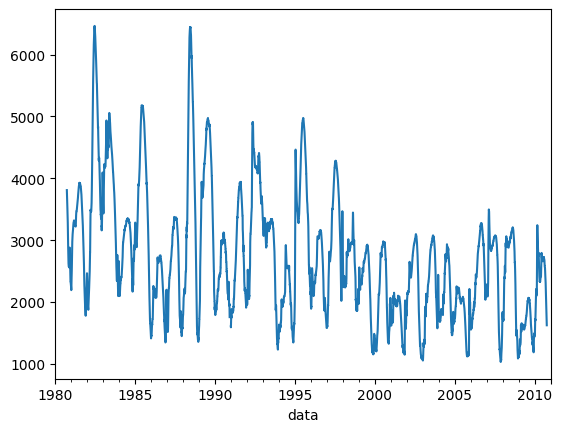

In [ ]:
df_climate_novo['Streamflow(m3/s)'].plot()

In [ ]:
df_streamflow_novo['Streamflow(m3/s)']

data
1980-10-01    3809.180
1980-10-02    3779.634
1980-10-03    3757.530
1980-10-04    3728.131
1980-10-05    3691.500
                ...   
2010-09-26    1682.560
2010-09-27    1666.090
2010-09-28    1633.326
2010-09-29    1622.457
2010-09-30         NaN
Name: Streamflow(m3/s), Length: 10957, dtype: float64

In [ ]:
df_climate_novo['Streamflow(m3/s)']['1980-10-01':'2010-09-29'].isna().sum()

27

In [ ]:
df_limpo = df_climate_novo['Streamflow(m3/s)']['1980-10-01':'2010-09-29'].isna()

In [ ]:
df_limpo[df_limpo==True]

data
1990-12-05    True
1990-12-06    True
1990-12-07    True
1990-12-08    True
1990-12-09    True
1990-12-10    True
1990-12-11    True
1990-12-12    True
1990-12-13    True
1990-12-14    True
1990-12-15    True
1990-12-16    True
1990-12-17    True
1990-12-18    True
1990-12-19    True
1990-12-20    True
1990-12-21    True
1990-12-22    True
1990-12-23    True
1990-12-24    True
1990-12-25    True
1990-12-26    True
1990-12-27    True
1990-12-28    True
1990-12-29    True
1990-12-30    True
1990-12-31    True
Name: Streamflow(m3/s), dtype: bool

In [ ]:
df_climate_novo['1991-01-01':'2010-09-29'].isna().sum()

p_ens(mm)           0
tmin_ens(oC)        0
tmax_ens(oC)        0
rh_ens(%)           0
wnd_ens(m/s)        0
srad_ens(MJm-2)     0
et_ens(mm)          0
pet_pm(mm)          0
pet_pt(mm)          0
pet_hg(mm)          0
Streamflow(m3/s)    0
dtype: int64

In [ ]:
df_climate_novo['1991-01-01':'2010-09-29']

,p_ens(mm),tmin_ens(oC),tmax_ens(oC),rh_ens(%),wnd_ens(m/s),srad_ens(MJm-2),et_ens(mm),pet_pm(mm),pet_pt(mm),pet_hg(mm),Streamflow(m3/s)
data,,,,,,,,,,,
1991-01-01,8.659,22.471,30.923,75.278,1.341,21.028,3.468,5.376,6.434,5.155,1606.203
1991-01-02,10.491,22.740,30.637,77.023,1.542,18.346,3.458,4.796,5.663,4.494,1590.009
1991-01-03,20.094,22.290,28.491,82.829,1.321,13.347,3.265,3.519,4.199,3.183,1627.888
1991-01-04,17.876,22.235,28.873,84.066,1.480,14.588,3.183,3.848,4.553,3.490,1704.611
1991-01-05,10.155,22.305,29.789,83.225,1.185,16.962,3.265,4.384,5.252,4.113,1726.767
...,...,...,...,...,...,...,...,...,...,...,...
2010-09-25,0.901,22.288,34.835,58.029,1.009,18.294,1.139,5.084,5.714,4.682,1721.218
2010-09-26,4.017,23.926,35.572,55.212,1.784,16.730,1.124,5.144,5.339,4.435,1682.560
2010-09-27,1.977,24.118,36.494,52.115,2.134,19.396,1.539,5.986,6.149,5.166,1666.090


## Exportar o arquivo para CSV

Vamos exportar o Dataframe para um CSV para ler ele mais facilmente na próxima vez.

In [ ]:
df_climate_novo['1991-01-01':'2010-09-29'].to_csv('CABra_526_climate+streamflow_edit.csv')